In [258]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [259]:
data_path = os.path.join("dataset_phishing.csv")
# Load Dataset
data = pd.read_csv(data_path)
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [260]:
data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [261]:
features = [
    'url', 'length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 
    'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 
    'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 
    'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 
    'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 
    'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 
    'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 
    'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'domain_registration_length', 
    'domain_age','status'
]

df = data[features]

In [262]:
null = df.isnull().sum()
for i in range(len(df.columns)):
    print(f"{df.columns[i]}: {null[i]} ({(null[i]/len(df))*100}%)")
total_cells = np.prod(df.shape)
total_missing = null.sum()
print(f"\nTotal missing values: {total_missing} ({(total_missing/total_cells) * 100}%)\n")

url: 0 (0.0%)
length_url: 0 (0.0%)
length_hostname: 0 (0.0%)
nb_dots: 0 (0.0%)
nb_hyphens: 0 (0.0%)
nb_at: 0 (0.0%)
nb_qm: 0 (0.0%)
nb_and: 0 (0.0%)
nb_or: 0 (0.0%)
nb_eq: 0 (0.0%)
nb_underscore: 0 (0.0%)
nb_tilde: 0 (0.0%)
nb_percent: 0 (0.0%)
nb_slash: 0 (0.0%)
nb_star: 0 (0.0%)
nb_colon: 0 (0.0%)
nb_comma: 0 (0.0%)
nb_semicolumn: 0 (0.0%)
nb_dollar: 0 (0.0%)
nb_space: 0 (0.0%)
nb_www: 0 (0.0%)
nb_com: 0 (0.0%)
nb_dslash: 0 (0.0%)
http_in_path: 0 (0.0%)
https_token: 0 (0.0%)
ratio_digits_url: 0 (0.0%)
ratio_digits_host: 0 (0.0%)
punycode: 0 (0.0%)
port: 0 (0.0%)
tld_in_path: 0 (0.0%)
tld_in_subdomain: 0 (0.0%)
abnormal_subdomain: 0 (0.0%)
nb_subdomains: 0 (0.0%)
prefix_suffix: 0 (0.0%)
random_domain: 0 (0.0%)
shortening_service: 0 (0.0%)
path_extension: 0 (0.0%)
char_repeat: 0 (0.0%)
shortest_words_raw: 0 (0.0%)
shortest_word_host: 0 (0.0%)
shortest_word_path: 0 (0.0%)
longest_words_raw: 0 (0.0%)
longest_word_host: 0 (0.0%)
longest_word_path: 0 (0.0%)
avg_words_raw: 0 (0.0%)
avg_word

In [263]:
numeric_cols = df.select_dtypes(include=['number']).columns
negative_values = (df[numeric_cols] < 0).any()
columns_with_negatives = negative_values[negative_values].index.tolist()
if columns_with_negatives:
    print("Columns with values less than zero:")
    for col in columns_with_negatives:
        print(f"Column: {col}")
        print(df[df[col] < 0][[col]])
else:
    print("There's no columns with value less than zero.")


Columns with values less than zero:
Column: domain_registration_length
       domain_registration_length
443                            -1
776                            -1
870                            -1
1092                           -1
1208                           -1
1225                           -1
1298                           -1
1830                           -1
2231                           -1
2316                           -1
2440                           -1
2629                           -1
2662                           -1
2784                           -1
2805                           -1
3819                           -1
3894                           -1
3908                           -1
4307                           -1
4451                           -1
4705                           -1
5195                           -1
5520                           -1
5977                           -1
6130                           -1
6623                           -1
6673       

In [264]:
df["nb_or"]

0        0
1        0
2        0
3        0
4        0
        ..
11425    0
11426    0
11427    0
11428    0
11429    0
Name: nb_or, Length: 11430, dtype: int64

In [265]:
non_zero_values = df[df["nb_or"] != 0]
print(non_zero_values)


Empty DataFrame
Columns: [url, length_url, length_hostname, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde, nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, nb_www, nb_com, nb_dslash, http_in_path, https_token, ratio_digits_url, ratio_digits_host, punycode, port, tld_in_path, tld_in_subdomain, abnormal_subdomain, nb_subdomains, prefix_suffix, random_domain, shortening_service, path_extension, char_repeat, shortest_words_raw, shortest_word_host, shortest_word_path, longest_words_raw, longest_word_host, longest_word_path, avg_words_raw, avg_word_host, avg_word_path, phish_hints, domain_in_brand, brand_in_subdomain, brand_in_path, suspecious_tld, domain_registration_length, domain_age, status]
Index: []

[0 rows x 55 columns]


In [266]:
df = df.drop(columns=['nb_or'])

In [267]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'domain_registration_length', 'domain_age', 'status'],
      dtype='object')

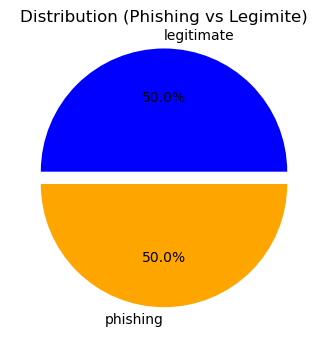

In [268]:
plt.figure(figsize=(6, 4))
data['status'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['blue', 'orange'],
    explode=[0.1, 0]
    )
plt.title('Distribution (Phishing vs Legimite)')
plt.ylabel('')
plt.show()


In [269]:
# Özellikler (features) ve hedef (target) olarak ayırma
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

X = df.drop(columns=['status'])  
y = df['status']  

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

df['status']


Features (X):
                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_eq  \
0               19        3           0      0      0       0      0   
1               23        1           0      0      0       0      0   
2               50        4           1      0      1       2      3   
3               11        2           0      0      0       0      0   
4               15        2           2      0      0       0      0   

   nb_underscore  ...  avg_words_raw  avg_word_host  avg_word_path  \
0              0  ...       5.750000            7.0       4.500000   
1   

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

# Process text features (TD-IDF)


In [270]:
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
print(non_numeric_columns)


Index(['url'], dtype='object')


In [271]:
unique_terms = len(set(" ".join(df['url']).split()))
print(f"Benzersiz terim sayısı: {unique_terms}")


Benzersiz terim sayısı: 11431


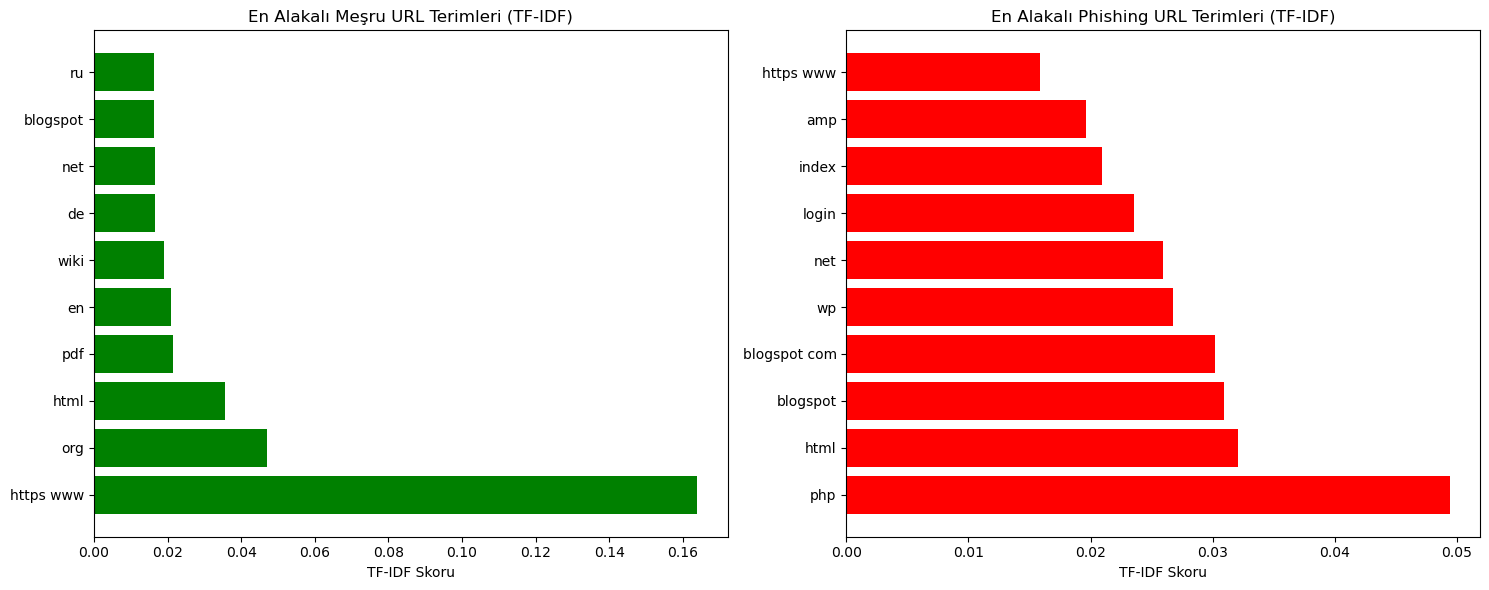

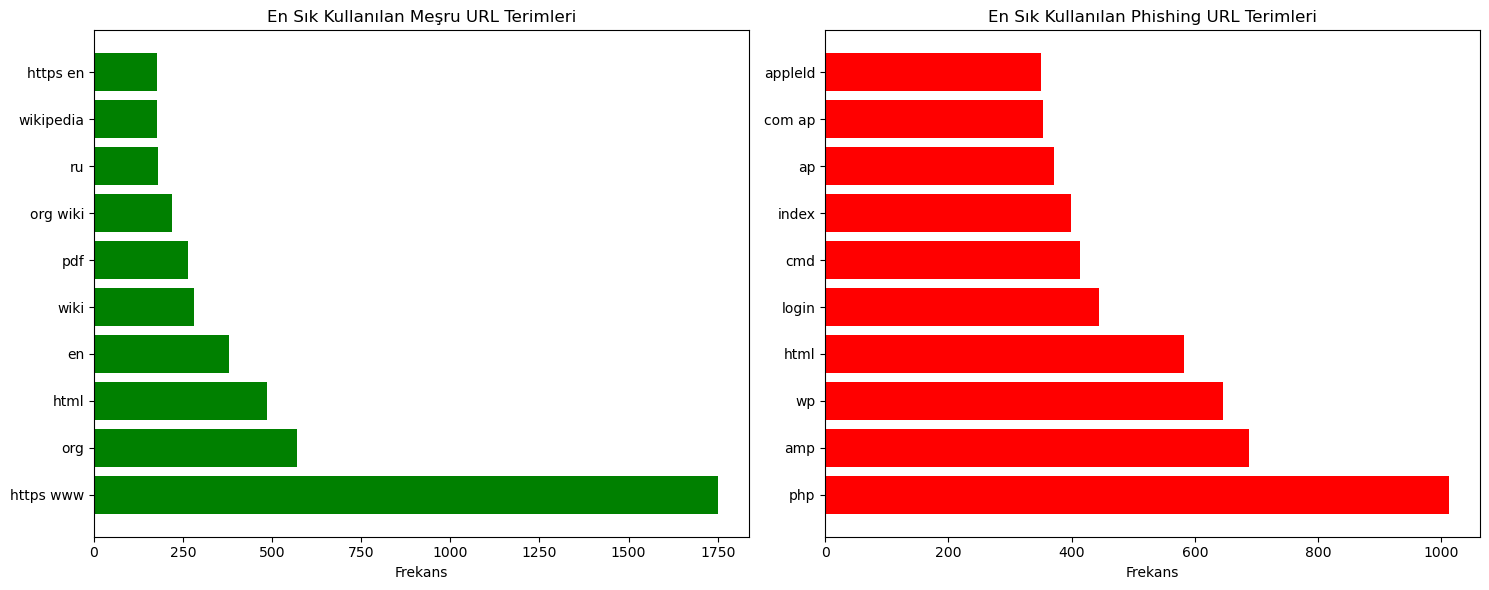


En alakalı meşru URL terimleri (TF-IDF):
https www    0.163982
org          0.047030
html         0.035618
pdf          0.021513
en           0.020914
wiki         0.018901
de           0.016641
net          0.016623
blogspot     0.016225
ru           0.016223
dtype: float64

En alakalı phishing URL terimleri (TF-IDF):
php             0.049426
html            0.032115
blogspot        0.030934
blogspot com    0.030177
wp              0.026740
net             0.025899
login           0.023520
index           0.020900
amp             0.019654
https www       0.015817
dtype: float64


In [272]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

urls = pd.DataFrame({'url': df['url'], 'label': df['status']})

# TF-IDF Vektörizasyonu
tfidf_vect = TfidfVectorizer(
    #analyzer='char_wb',  # URL'ler için karakter tabanlı analiz
    ngram_range=(1, 2),
    max_df=0.25,
    max_features=1000,
    stop_words=None
)

urls_tfidfs = tfidf_vect.fit_transform(urls['url'])

# TF-IDF skorlarını DataFrame'e dönüştür
tfidfs = pd.DataFrame.sparse.from_spmatrix(
    urls_tfidfs, 
    columns=tfidf_vect.get_feature_names_out()
)
tfidfs['label'] = urls['label']

# Meşru URL'lerdeki en alakalı terimleri bul
legitimate_terms = tfidfs[tfidfs['label'] == 0].drop('label', axis=1).mean(axis=0).sort_values(ascending=False)[:10]

# Phishing URL'lerindeki en alakalı terimleri bul
phishing_terms = tfidfs[tfidfs['label'] == 1].drop('label', axis=1).mean(axis=0).sort_values(ascending=False)[:10]

plt.figure(figsize=(15, 6))

# Meşru URLs
plt.subplot(1, 2, 1)
plt.barh(legitimate_terms.index, legitimate_terms.values, color='green')
plt.title('En Alakalı Meşru URL Terimleri (TF-IDF)')
plt.xlabel('TF-IDF Skoru')

# Phishing URLs
plt.subplot(1, 2, 2)
plt.barh(phishing_terms.index, phishing_terms.values, color='red')
plt.title('En Alakalı Phishing URL Terimleri (TF-IDF)')
plt.xlabel('TF-IDF Skoru')

plt.tight_layout()
plt.show()

cv = CountVectorizer(
    #analyzer='char_wb',
    ngram_range=(1, 2),
    max_df=0.25,
    max_features=1000
)

urls_tf = cv.fit_transform(urls['url'])
tfs = pd.DataFrame.sparse.from_spmatrix(urls_tf, columns=cv.get_feature_names_out())
tfs['label'] = urls['label']

# En sık kullanılan terimleri bul
legitimate_freq = tfs[tfs['label'] == 0].drop('label', axis=1).sum(axis=0).nlargest(10)
phishing_freq = tfs[tfs['label'] == 1].drop('label', axis=1).sum(axis=0).nlargest(10)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.barh(legitimate_freq.index, legitimate_freq.values, color='green')
plt.title('En Sık Kullanılan Meşru URL Terimleri')
plt.xlabel('Frekans')

plt.subplot(1, 2, 2)
plt.barh(phishing_freq.index, phishing_freq.values, color='red')
plt.title('En Sık Kullanılan Phishing URL Terimleri')
plt.xlabel('Frekans')

plt.tight_layout()
plt.show()

print("\nEn alakalı meşru URL terimleri (TF-IDF):")
print(legitimate_terms)
print("\nEn alakalı phishing URL terimleri (TF-IDF):")
print(phishing_terms)


In [274]:
urls = df['url']
df = df.drop('url', axis=1)
print("\nTarget (y):")
print(y.head())


Target (y):
0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int64


In [198]:
df = pd.concat([df, tfidfs], axis=1)

print("DataFrame'in yeni boyutu:", df.shape)
print("\nYeni sütunlardan ilk 5 tanesi:")
print(list(df.columns)[-5:])

DataFrame'in yeni boyutu: (11430, 1054)

Yeni sütunlardan ilk 5 tanesi:
['yourdictionary com', 'youtube', 'youtube com', 'za', 'status']


In [199]:
df.head()


,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,...,xyz,yahoo,you,your,yourdictionary,yourdictionary com,youtube,youtube com,za,status
0,37,19,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,77,23,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,126,50,4,1,0,1,2,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,18,11,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,55,15,2,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [200]:
# Normalize numeric features
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_features = numeric_features.drop('status') if 'status' in numeric_features else numeric_features
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()


C:\Users\Eren\anaconda3\envs\PhishingDetection\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Eren\anaconda3\envs\PhishingDetection\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,...,xyz,yahoo,you,your,yourdictionary,yourdictionary com,youtube,youtube com,za,status
0,0.015347,0.071429,0.086957,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.039902,0.090476,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.069982,0.219048,0.130435,0.023256,0.0,0.333333,0.105263,0.157895,0.111111,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.003683,0.033333,0.043478,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.026397,0.052381,0.043478,0.046512,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [201]:
df.describe()


,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,...,xyz,yahoo,you,your,yourdictionary,yourdictionary com,youtube,youtube com,za,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,0.030158,0.081382,0.064381,0.023199,0.005556,0.047069,0.008542,0.015430,0.017926,0.006649,...,0.001185,0.001363,0.000643,0.001309,0.001495,0.001495,0.002854,0.002849,0.001524,0.500000
std,0.033946,0.051320,0.059552,0.048537,0.038875,0.121485,0.043228,0.052543,0.060741,0.081274,...,0.032373,0.029431,0.018658,0.027556,0.033489,0.033489,0.046742,0.047160,0.030829,0.500022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.012891,0.052381,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.021486,0.071429,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.036219,0.095238,0.086957,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [202]:
# Özellikler (features) ve hedef (target) olarak ayırma
#df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

X = df.drop(columns=['status'])  

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
   length_url  length_hostname   nb_dots  nb_hyphens  nb_at     nb_qm  \
0    0.015347         0.071429  0.086957    0.000000    0.0  0.000000   
1    0.039902         0.090476  0.000000    0.000000    0.0  0.000000   
2    0.069982         0.219048  0.130435    0.023256    0.0  0.333333   
3    0.003683         0.033333  0.043478    0.000000    0.0  0.000000   
4    0.026397         0.052381  0.043478    0.046512    0.0  0.000000   

     nb_and     nb_eq  nb_underscore  nb_tilde  ...  www youtube  xyz  yahoo  \
0  0.000000  0.000000       0.000000       0.0  ...          0.0  0.0    0.0   
1  0.000000  0.000000       0.000000       0.0  ...          0.0  0.0    0.0   
2  0.105263  0.157895       0.111111       0.0  ...          0.0  0.0    0.0   
3  0.000000  0.000000       0.000000       0.0  ...          0.0  0.0    0.0   
4  0.000000  0.000000       0.000000       0.0  ...          0.0  0.0    0.0   

   you  your  yourdictionary  yourdictionary com  youtube  youtube

# Evaluation Helper Functions


In [203]:
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

# CNN MODEL


In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [152]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9144, 2052, 1) (9144,)
(2286, 2052, 1) (2286,)


In [153]:
input_size = X_train[1].shape
input_size

(2052, 1)

In [156]:
from tensorflow import keras 
from tensorflow.keras import layers 
from keras import Sequential

def CNN(input_size):

    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_model = CNN(input_size)
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 2052, 16)          64        
                                                                 
 dropout_7 (Dropout)         (None, 2052, 16)          0         
                                                                 
 batch_normalization_5 (Bat  (None, 2052, 16)          64        
 chNormalization)                                                
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 1026, 16)          0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 1026, 32)          1568      
                                                                 
 dropout_8 (Dropout)         (None, 1026, 32)         

In [157]:
import tensorflow as tf 

CNN_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_ = CNN_model.fit(X_train,y_train,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.6789 - accuracy: 0.7288
Epoch 1: val_loss improved from inf to 0.75235, saving model to CNN_MODEL.h5
58/58 [==============================] - 23s 367ms/step - loss: 0.6789 - accuracy: 0.7288 - val_loss: 0.7523 - val_accuracy: 0.5167


C:\Users\Eren\anaconda3\envs\PhishingDetection\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/200
58/58 [==============================] - ETA: 0s - loss: 0.3969 - accuracy: 0.8068
Epoch 2: val_loss did not improve from 0.75235
58/58 [==============================] - 20s 342ms/step - loss: 0.3969 - accuracy: 0.8068 - val_loss: 0.8262 - val_accuracy: 0.5167
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.3496 - accuracy: 0.8377
Epoch 3: val_loss did not improve from 0.75235
58/58 [==============================] - 19s 336ms/step - loss: 0.3496 - accuracy: 0.8377 - val_loss: 0.7999 - val_accuracy: 0.5167
Epoch 4/200
58/58 [==============================] - ETA: 0s - loss: 0.3236 - accuracy: 0.8529
Epoch 4: val_loss improved from 0.75235 to 0.65439, saving model to CNN_MODEL.h5
58/58 [==============================] - 20s 337ms/step - loss: 0.3236 - accuracy: 0.8529 - val_loss: 0.6544 - val_accuracy: 0.5549
Epoch 5/200
58/58 [==============================] - ETA: 0s - loss: 0.2935 - accuracy: 0.8734
Epoch 5: val_loss improved from 0.65439 to 0.6007

In [158]:
CNN_model.evaluate(X_test,y_test,verbose = 1)


72/72 [==============================] - 2s 21ms/step - loss: 0.2700 - accuracy: 0.9151


[0.26997464895248413, 0.9151356220245361]

# LSTM

In [219]:
print(X_train.shape) 
print(X_test.shape)   

(2286, 1052, 1)
(9144, 1052, 1)


In [235]:
from tensorflow import keras 
from tensorflow.keras import layers 
import tensorflow as tf

def Optimized_LSTM(input_size):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(input_size))
    
    model.add(layers.LSTM(units=128, return_sequences=True))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    
    model.add(layers.LSTM(units=128, return_sequences=False))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

input_size = (X_train.shape[1],)
optimized_lstm = Optimized_LSTM(input_size)

optimized_lstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Optimized_LSTM_MODEL.h5',
        verbose=1,
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=20,  
        verbose=1
    )
]

optimized_results = optimized_lstm.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=128,  
    epochs=50,   
    callbacks=callbacks
)

Epoch 1/50
58/58 [==============================] - ETA: 0s - loss: 0.6672 - accuracy: 0.5664
Epoch 1: val_loss improved from inf to 0.70229, saving model to Optimized_LSTM_MODEL.h5
58/58 [==============================] - 258s 4s/step - loss: 0.6672 - accuracy: 0.5664 - val_loss: 0.7023 - val_accuracy: 0.4833
Epoch 2/50


C:\Users\Eren\anaconda3\envs\PhishingDetection\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/58 [==============================] - ETA: 0s - loss: 0.6379 - accuracy: 0.5791
Epoch 2: val_loss did not improve from 0.70229
58/58 [==============================] - 249s 4s/step - loss: 0.6379 - accuracy: 0.5791 - val_loss: 0.7440 - val_accuracy: 0.4833
Epoch 3/50
58/58 [==============================] - ETA: 0s - loss: 0.6207 - accuracy: 0.5880
Epoch 3: val_loss did not improve from 0.70229
58/58 [==============================] - 243s 4s/step - loss: 0.6207 - accuracy: 0.5880 - val_loss: 0.7488 - val_accuracy: 0.4833
Epoch 4/50
58/58 [==============================] - ETA: 0s - loss: 0.6115 - accuracy: 0.6004
Epoch 4: val_loss improved from 0.70229 to 0.69351, saving model to Optimized_LSTM_MODEL.h5
58/58 [==============================] - 243s 4s/step - loss: 0.6115 - accuracy: 0.6004 - val_loss: 0.6935 - val_accuracy: 0.5167
Epoch 5/50
58/58 [==============================] - ETA: 0s - loss: 0.6168 - accuracy: 0.5930
Epoch 5: val_loss did not improve from 0.69351
58/58 [=====

In [275]:
train_loss, train_accuracy = optimized_lstm.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = optimized_lstm.evaluate(X_test, y_test, verbose=0)

print('\nEğitim Performansı:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Loss: {train_loss:.4f}')

print('\nTest Performansı:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Loss: {test_loss:.4f}')



from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred = (optimized_lstm.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))


Eğitim Performansı:
Accuracy: 0.5016
Loss: 4.6634

Test Performansı:
Accuracy: 0.4939
Loss: 4.7555
72/72 [==============================] - 15s 202ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1157
           1       0.49      1.00      0.66      1129

    accuracy                           0.49      2286
   macro avg       0.25      0.50      0.33      2286
weighted avg       0.24      0.49      0.33      2286



C:\Users\Eren\anaconda3\envs\PhishingDetection\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eren\anaconda3\envs\PhishingDetection\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eren\anaconda3\envs\PhishingDetection\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

# LSTM+CNN

In [227]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
input_size = X_train[1].shape
input_size

(9144, 1052, 1) (9144,)
(2286, 1052, 1) (2286,)


(1052, 1)

In [228]:
def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_LSTM_model = CNN_LSTM(input_size)
CNN_LSTM_model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 1052, 16)          64        
                                                                 
 dropout_50 (Dropout)        (None, 1052, 16)          0         
                                                                 
 batch_normalization_38 (Ba  (None, 1052, 16)          64        
 tchNormalization)                                               
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 526, 16)           0         
 ng1D)                                                           
                                                                 
 conv1d_16 (Conv1D)          (None, 526, 32)           1568      
                                                                 
 dropout_51 (Dropout)        (None, 526, 32)         

In [229]:
CNN_LSTM_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results = CNN_LSTM_model.fit(X_train,y_train,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.5447 - accuracy: 0.7003
Epoch 1: val_loss improved from inf to 0.71757, saving model to CNN_LSTM_MODEL.h5
58/58 [==============================] - 59s 966ms/step - loss: 0.5447 - accuracy: 0.7003 - val_loss: 0.7176 - val_accuracy: 0.4833
Epoch 2/200
58/58 [==============================] - ETA: 0s - loss: 0.4075 - accuracy: 0.8029
Epoch 2: val_loss did not improve from 0.71757
58/58 [==============================] - 55s 952ms/step - loss: 0.4075 - accuracy: 0.8029 - val_loss: 0.7719 - val_accuracy: 0.4833
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.3399 - accuracy: 0.8473
Epoch 3: val_loss improved from 0.71757 to 0.68324, saving model to CNN_LSTM_MODEL.h5
58/58 [==============================] - 55s 952ms/step - loss: 0.3399 - accuracy: 0.8473 - val_loss: 0.6832 - val_accuracy: 0.4833
Epoch 4/200
58/58 [==============================] - ETA: 0s - loss: 0.3098 - accuracy: 0.8640
Epoch 4: 